Nama : SEPTAVIA NAVIS

Kelas : DS4

## DAY 4

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path='/content/drive/MyDrive/DataSource/Chapter06DataSet.csv'
load_data=pd.read_csv(path)
load_data

,Weight,Cholesterol,Gender
0,102,111,1
1,115,135,1
2,115,136,1
3,140,167,0
4,130,158,1
...,...,...,...
542,172,207,1
543,129,157,1
544,107,115,1
545,117,147,1


In [4]:
df=pd.DataFrame(load_data)
df

,Weight,Cholesterol,Gender
0,102,111,1
1,115,135,1
2,115,136,1
3,140,167,0
4,130,158,1
...,...,...,...
542,172,207,1
543,129,157,1
544,107,115,1
545,117,147,1


### Business Understanding

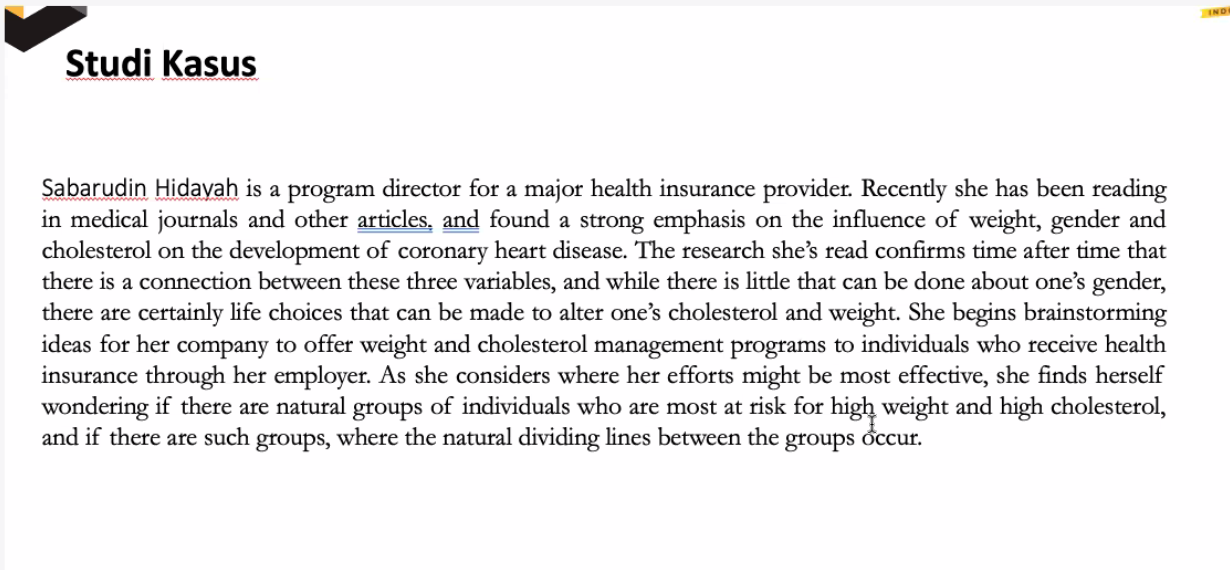

Sabarudin Hidayah adalah seorang program director di sebuah perusahaan asuransi kesehatan besar. Baru-baru ini, ia telah membaca jurnal medis dan artikel lainnya, dan menemukan bahwa ada penekanan yang kuat pada pengaruh berat badan, jenis kelamin, dan kolesterol pada perkembangan penyakit jantung koroner. Penelitian yang telah ia baca menegaskan berulang kali bahwa ada hubungan antara ketiga variabel ini, dan sementara tidak ada yang dapat dilakukan tentang jenis kelamin seseorang, ada tentu saja pilihan hidup yang dapat dibuat untuk mengubah kolesterol dan berat badan seseorang.

Ia mulai memunculkan ide untuk perusahaannya untuk menawarkan program manajemen berat badan dan kolesterol kepada individu yang menerima asuransi kesehatan melalui pemberi kerja mereka. Saat ia mempertimbangkan di mana upayanya mungkin paling efektif, ia mendapati dirinya bertanya-tanya apakah ada kelompok alami individu yang paling berisiko untuk berat badan tinggi dan kolesterol tinggi, dan jika ada kelompok seperti itu, di mana garis pemisah alami antara kelompok-kelompok tersebut terjadi.

**Case problem** : Clustering

**Jenis Machine Learning** = Unsupervised Learning

**Goal** : Predictif Tingkat Resiko Jantung Koroner

**Algoritma** : K-Means

### Data Understanding

In [5]:
df

,Weight,Cholesterol,Gender
0,102,111,1
1,115,135,1
2,115,136,1
3,140,167,0
4,130,158,1
...,...,...,...
542,172,207,1
543,129,157,1
544,107,115,1
545,117,147,1


In [6]:
import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(df, *['Cholesterol', 'Gender'], **{})
chart

<Figure size 600x600 with 0 Axes>

**ANALISIS KOLESTEROL**

 Kolesterol total:
  * A
* Normal : <200 mg/dL (miligram per desiliter) atau 5.2 mol/L (milimol per Liter)
* Tidak normal : >=200 mg/dL. Kolesterol LDL (Low-Density Lipoprotein "Kolesterol Jahat")

  * B
* Normal : <100 mg/dL atau 2.6 mol/L
* Tidak normal : >=100 mg/dL. Kolesterol HDL (High-Density Lipoprotein "Kolesterol Baik")

  * C
* Normal (tinggi): >=60 mg/dL dianggap baik untuk kesehatan jantung
* Tidak normal : >40 mg/dL pada pria atau <50 mg/dL pada wanita dianggap rrendah

In [7]:
import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df, *['Cholesterol'], **{})
chart

**Cholesterol berdasarkan Jumlah Nasabah**

Ada >50 nasabah asuransi yang teridentifikasi high cholesterol, dari grafik ditunjukkan pada range 20 s/d 239

In [8]:
import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(df, *['Weight', 'Cholesterol'], **{})
chart

<Figure size 600x600 with 0 Axes>

**Cholesterol dan Weight**

- Ada pola hubungan berbanding lurus antara cholesterol dan weight
- Artinya jika weight bertambah, maka cholesterol juga bertambah

In [9]:
import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(df, *['Gender', 'Cholesterol'], **{})
chart

<Figure size 600x600 with 0 Axes>

**Gender vs Cholesterol**

 Antara laki-laki dan perempuan memiliki kesamaan, berpeluang kolesterol tinggi

### Data Preparation

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Weight       547 non-null    int64
 1   Cholesterol  547 non-null    int64
 2   Gender       547 non-null    int64
dtypes: int64(3)
memory usage: 12.9 KB


In [11]:
df.isnull().sum()

Weight         0
Cholesterol    0
Gender         0
dtype: int64

TIDAK DILAKUKAN DATA PREPARATION, KARENA DATA DALAM KEADAAN BERSIH DAN MEMILIKI TIPE DATA NUMERIK SESUAI DENGAN ALGORTIMA-nya

### Data Modelling with Clustering

#### Evaluasi Clustering
1. Dibutuhkan untuk menentukan berapa nilai K yang akan di input kedalam n_cluster
2. Akan digunakan Teknik Elbow methodologi untuk menemukan nilai K yang optimum

In [12]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [13]:
# Input variabel
x=df[['Weight', 'Cholesterol', 'Gender']]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

<function matplotlib.pyplot.show(close=None, block=None)>

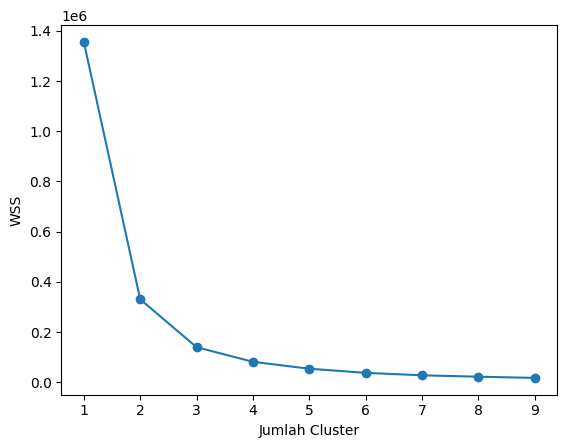

In [14]:
# ELBOW METHOD
cluster_range=range(1,10)
cluster_wss=[] #menghitung seberapa dekat

for num_cluster in cluster_range:
  clusters=KMeans(num_cluster)
  clusters.fit(x)
  cluster_wss.append(clusters.inertia_)

plt.xlabel('Jumlah Cluster')
plt.ylabel('WSS')
plt.plot(cluster_range, cluster_wss, marker='o')
plt.show

Elbow Method
- Teknik untuk menentukan n cluster, dimana n adalah nilai terbaik
- WSS = Within-Cluster Sum of Squares adalah metrix untuk mengukur cluster
- Nilai n cluster terbaik versi Elbow method adalah 3 s/d 4

### Clustering K-Means

In [15]:
cls=KMeans(
    n_clusters=4,
    random_state=0
)
#membentuk model
model_cls=cls.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [16]:
df['Cluster']=model_cls.labels_
df.head()

,Weight,Cholesterol,Gender,Cluster
0,102,111,1,1
1,115,135,1,1
2,115,136,1,1
3,140,167,0,2
4,130,158,1,2


In [17]:
df['Cluster'].value_counts()

1    152
0    147
2    140
3    108
Name: Cluster, dtype: int64

In [18]:
import plotly.express as px
fig=px.scatter(
    df,
    x='Weight',
    y='Cholesterol',
    color='Cluster',
    size='Weight',
    hover_data=['Cholesterol']
)
fig.show()

**Hasil Analisis Cluster**

Didapatkan 4 kelompok orang yang beresiko Jantung Koroner. Berikut ini kelompok cluster berdasarkan resiko:
1. **Cluster 0** : ***Cluster High Risk*** --> Kelompok nasabah yang memiliki resiko tinggi jantung koroner
2. **Cluster 3** : ***Cluster Potentional High Risk*** --> Kelompok nasabah yang memiliki kecenderungan resiko tinggi jantung koroner. Hal ini ditunjukkan cholesterol dan weight berada pada ambang batar NORMAL
3. **Cluster 2** : ***Cluster Moderat*** --> Kelompok nasabah yang berada diantara low risk dan potentional risk
4. **Cluster 1** : ***Cluster Low Risk*** --> Kelompok nasabah yang memiliki resiko rendah, cholesterol dan weight rendah

Berapakah jumlah nasabah yang akan di prospek untuk mengikuti program baru "TREATMENT" mengurangi resiko jantung koroner?

Penjumlahan cluster 0 dan cluster 3

In [19]:
def count_prospects(
    df,
    cluster_high_risk,
    cluster_potential_high_risk
):
  # Mendapatkan data nasabah berdasarkan cluster
  high_risk_customers = df[df['Cluster'] == cluster_high_risk]
  potential_high_risk_customers = df[df['Cluster'] == cluster_potential_high_risk]

  # Menghitung jumlah nasabah
  return len(high_risk_customers) + len(potential_high_risk_customers)

# Mendefinisikan nilai cluster
cluster_high_risk = 0
cluster_potential_high_risk = 3

# Menghitung jumlah nasabah yang akan di prospek
prospects = count_prospects(
    df,
    cluster_high_risk,
    cluster_potential_high_risk
)
print(f'Jumlah nasabah yang akan di prospek: {prospects}')

Jumlah nasabah yang akan di prospek: 255
